In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

# 모델에 맞게 데이터 가공
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_reshaped = x_train_norm.reshape(-1, x_train_norm.shape[1]*x_train_norm.shape[2])
x_test_reshaped = x_test_norm.reshape(-1, x_test_norm.shape[1]*x_test_norm.shape[2])

# 딥러닝 모델 구성 - 2 Layer Perceptron
model=keras.models.Sequential()
model.add(keras.layers.Dense(50, activation='sigmoid', input_shape=(784,)))  # 입력층 d=784, 은닉층 레이어 H=50
model.add(keras.layers.Dense(10, activation='softmax'))   # 출력층 레이어 K=10
model.summary()

# 모델 구성과 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=10)

# 모델 테스트 결과
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 2s 823us/step - loss: 0.4927 - accuracy: 0.8836
Epoch 2/10
1875/1875 [==============================] - 1s 743us/step - loss: 0.2270 - accuracy: 0.9362
Epoch 3/10
1875/1875 [==============================] - 1s 756us/step - loss: 0.1776 - accuracy: 0.9492
Epoch 4/10
1875/1875 [==============================] - 2s 839us/step - loss: 0.1483 - accuracy: 0.9578
Epoch 5/10
1875/1875 [==============================] - 1s 730us/step - loss: 0.1277 - accuracy: 0

## 다중 퍼셉트론

In [2]:
# 입력층 데이터의 모양(shape)
print(x_train_reshaped.shape)

# 테스트를 위해 x_train_reshaped의 앞 5개의 데이터를 가져온다.
X = x_train_reshaped[:5]
print(X.shape)

(60000, 784)
(5, 784)


In [3]:
weight_init_std = 0.1
input_size = 784
hidden_size = 50

# 인접 레이어간 관계를 나타내는 파라미터 W를 생성하고 random 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
# 바이어스 파라미터 b를 생성하고 Zero로 초기화
b1 = np.zeros(hidden_size)

a1 = np.dot(X, W1) + b1 # 은닉층 출력

print(W1.shape)
print(b1.shape)
print(a1.shape)

(784, 50)
(50,)
(5, 50)


In [4]:
# 첫번째 데이터의 은닉층 출력을 확인해 봅시다.  50dim의 벡터가 나오나요?
a1[0]

array([-1.48099008, -1.04006828, -0.29723936,  1.03423452,  0.87014776,
        1.35192929, -0.47481785, -0.06156481, -0.85526209, -0.04315815,
        0.85936902,  0.18435168,  0.56426983, -0.95716621, -0.20110514,
       -0.68361341, -0.63037418,  1.08347583,  0.45040321,  1.33284248,
        0.47534004, -0.60308627, -1.2318538 ,  0.8763762 ,  1.06104756,
        0.88244319, -0.14347332, -1.22740893,  0.3447011 , -2.04599138,
        1.01593618,  0.83864359, -1.38698003,  1.12418363,  0.4317148 ,
        0.8616657 ,  0.18100458,  0.50743837, -0.35827228, -0.79667329,
        1.39837625,  1.13515609,  0.50976921, -1.16355201, -1.79674015,
        1.19085923, -0.55049533, -0.859402  , -0.54515442,  0.20738491])

## 활성화 함수, 손실 함수

### Sigmoid

In [5]:
# 위 수식의 sigmoid 함수를 구현해 봅니다.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

z1 = sigmoid(a1)
print(z1[0])  # sigmoid의 출력은 모든 엘리먼트가 0에서 1사이

[0.18527792 0.26113682 0.42623248 0.73773602 0.70477644 0.79444486
 0.38347656 0.48461366 0.29833018 0.48921214 0.70252881 0.54595784
 0.63743992 0.27744593 0.44989248 0.3354553  0.3474257  0.74715119
 0.6107351  0.79131043 0.61664689 0.35363792 0.22585713 0.70607072
 0.74289068 0.70732825 0.46419307 0.22663524 0.58533202 0.11445806
 0.73418026 0.69817946 0.19989032 0.75476391 0.60628307 0.70300855
 0.545128   0.62420578 0.41137786 0.31073758 0.8019261  0.75678918
 0.62475237 0.23802247 0.14224835 0.7668947  0.3657495  0.2974643
 0.36698935 0.5516612 ]


## 단일 레이어 구현

In [6]:
def affine_layer_forward(X, W, b):
    y = np.dot(X,W)+b
    cache = (X,W,b)
    return y, cache

In [7]:
input_size = 784
hidden_size = 50
output_size = 10

W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)   # z1이 다시 두번째 레이어의 입력이 됩니다. 

print(a2[0])  # 최종 출력이 output_size만큼의 벡터가 되었습니다.

[-0.00214827 -0.01405865 -0.04628361  0.26961687 -0.25859359  0.11089166
 -0.25995219  0.691356    0.51199881 -0.55668283]


In [8]:
def softmax(x : np.array):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T
    
    x = x - np.max(x)  # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [9]:
y_hat = softmax(a2)
y_hat[0]

array([0.08951951, 0.08845962, 0.08565445, 0.11747455, 0.06926995,
       0.1002329 , 0.06917591, 0.17910296, 0.14969556, 0.05141459])

## 오차함수 (손실함수)

In [10]:
# 정답 라벨을 One-hot 인코딩하는 함수
def _change_one_hot_label(X, num_category):
    T = np.zeros((X.size, num_category))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
    
    return T

Y_digit = y_train[:5]
t = _change_one_hot_label(Y_digit, 10)
t     # 정답 라벨의 One-hot 인코딩

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [11]:
print(y_hat[0])
print(t[0])

[0.08951951 0.08845962 0.08565445 0.11747455 0.06926995 0.1002329
 0.06917591 0.17910296 0.14969556 0.05141459]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
def cross_entropy_error(y: np.ndarray,t: np.ndarray):
    if y.ndim == 1:
        t=t.reshape(1, t.size)
        y=y.reshape(1, y,size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size
    
Loss = cross_entropy_error(y_hat, t)
Loss

2.5077793330878833

## 경사하강법
- cross_entropy_error의 미분   
https://deepnotes.io/softmax-crossentropy

- Cross_entropy_error(Softmax)의 미분

$$\frac{\partial Loss}{\partial O_i} = p_i-y_i $$

In [13]:
batch_num = y_hat.shape[0]
dy = (y_hat - t) / batch_num
dy  # softmax값의 출력으로 Loss를 미분한 값

array([[ 0.0179039 ,  0.01769192,  0.01713089,  0.02349491,  0.01385399,
        -0.17995342,  0.01383518,  0.03582059,  0.02993911,  0.01028292],
       [-0.17799287,  0.02011079,  0.01605329,  0.02554569,  0.01243581,
         0.02078119,  0.01293193,  0.03040419,  0.03085231,  0.00887767],
       [ 0.01836317,  0.02337388,  0.01671633,  0.02048622, -0.18782166,
         0.01662264,  0.01338683,  0.02729659,  0.04105071,  0.01052529],
       [ 0.01807155, -0.17939895,  0.01613336,  0.02648186,  0.01225499,
         0.01978049,  0.01427819,  0.03012297,  0.03289452,  0.00938102],
       [ 0.02079968,  0.02007569,  0.01540233,  0.01864757,  0.01325988,
         0.02065843,  0.01153811,  0.03143959,  0.03781547, -0.18963678]])

- Chain rule로 다른 Weight의 기울기 구하기



$$\frac{\partial Loss}{\partial W2} = \frac{\partial Loss}{\partial y}\frac{\partial y}{\partial W2} \\
y={W2}\cdot{z1}+b2 \\
\frac{\partial Loss}{\partial W2} = {dy}\cdot{z1}
$$

In [14]:
dW2 = np.dot(z1.T, dy)
db2 = np.sum(dy, axis=0)

In [15]:
# sigmoid gradient
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [16]:
dz1 = np.dot(dy, W2.T)
da1 = sigmoid_grad(a1) * dz1
dW1 = np.dot(X.T, da1)
db1 = np.sum(dz1, axis=0)

In [17]:
learning_rate = 1e-1

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    return W1, b1, W2, b2

## 오차역전파법

In [18]:
def affine_layer_backward(dy, cache):
    X, W, b = cache
    dX = np.dot(dy, W.T)
    dW = np.dot(X.T, dy)
    db = np.sum(dy, axis=0)
    return dX, dW, db

## 학습하는 과정
- 초기화, 순전파, 손실함수의 오차, 기울기, 경사하강법

In [19]:
# 파라미터 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# 순전파
a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)

# 추론과 오차(Loss) 계산
y_hat = softmax(a2)
t = _change_one_hot_label(Y_digit, 10)
Loss = cross_entropy_error(y_hat, t)

print(y_hat)
print(t)
print('Loss : ', Loss)

dy = (y_hat - t) / X.shape[0]
dz1, dW2, db2 = affine_layer_backward(dy, cache2)
da1 = sigmoid_grad(a1) * dz1
dX, dW1, db1 = affine_layer_backward(da1, cache1)

# 경사하강법으로 파라미터 업데이트
learning_rate = 0.1
W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

[[0.07682302 0.12043365 0.08031143 0.10448095 0.11152734 0.12154945
  0.0795281  0.10993899 0.10458934 0.09081773]
 [0.07545841 0.11786192 0.0744111  0.11034405 0.12185095 0.11571054
  0.07087113 0.12365814 0.09252398 0.09730979]
 [0.08053186 0.10778535 0.09278188 0.09641179 0.11261346 0.14238011
  0.09252071 0.09271963 0.10140637 0.08084883]
 [0.08067985 0.10963362 0.08173851 0.1235233  0.11360062 0.14211472
  0.08741377 0.10666508 0.08351368 0.07111685]
 [0.06299005 0.14146918 0.07346407 0.09644788 0.11362958 0.14725755
  0.09604249 0.10402404 0.08623942 0.07843575]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss :  2.3262976923354373


## training step 함수

In [20]:
# 파라미터 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

In [21]:
# 훈련 1번 진행하는 함수
def train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=False):
    a1, cache1 = affine_layer_forward(X, W1, b1)
    z1 = sigmoid(a1)
    a2, cache2 = affine_layer_forward(z1, W2, b2)
    y_hat = softmax(a2)
    t = _change_one_hot_label(Y, 10)
    Loss = cross_entropy_error(y_hat,t)
    
    if verbose:
        print('----------')
        print(y_hat)
        print(t)
        print('Loss : ',Loss)
    
    dy = (y_hat - t) / X.shape[0]
    dz1, dW2, db2 = affine_layer_backward(dy, cache2)
    da1 = sigmoid_grad(a1) * dz1
    dX, dW1, db1 = affine_layer_backward(da1, cache1)
    
    # 경사하강법을 통한 파라미터 업데이트
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    return W1, b1, W2, b2, Loss

In [22]:
X = x_train_reshaped[:5]
Y = y_train[:5]

for i in range(5):
    W1, b1, W2, b2, _ = train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=True)

----------
[[0.06103815 0.14674694 0.10551228 0.09400224 0.13081939 0.21431178
  0.08641272 0.05139482 0.07162626 0.03813542]
 [0.05287679 0.1474312  0.09864658 0.08541203 0.12641216 0.23137785
  0.09314516 0.059026   0.07115167 0.03452056]
 [0.06734278 0.13173538 0.10123678 0.09870762 0.12664933 0.21870928
  0.08881497 0.05089033 0.07524184 0.04067168]
 [0.05042254 0.16564288 0.08671952 0.07640116 0.14113348 0.21344997
  0.0863111  0.05194566 0.08836352 0.03961017]
 [0.06167816 0.11374534 0.09012152 0.08143565 0.14600308 0.22433365
  0.08239594 0.05610342 0.08867194 0.05551129]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss :  2.2471074797413366
----------
[[0.07920355 0.1597943  0.09088724 0.08207324 0.14058582 0.21584559
  0.07444708 0.04669837 0.0629224  0.0475424 ]
 [0.0722158  0.1631713  0.08475235 0.07476447 0.13609539 0.22820445
  0.08011117 0.05417549 0.

## 추론과정, 정확도(Accuracy) 계산

In [23]:
def predict(W1, b1, W2, b2, X):
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)
    
    return y

In [24]:
# X = x_train[:100]에 대해 모델 추론 시행

X = x_train_reshaped[:100]
Y = y_train[:100]
result = predict(W1, b1, W2, b2, X)
result[0]

array([0.15439536, 0.17021578, 0.05389031, 0.04989357, 0.15127919,
       0.22208195, 0.04360028, 0.03068334, 0.03832092, 0.0856393 ])

In [25]:
def accuracy(W1, b1, W2, b2, x, y):
    y_hat = predict(W1, b1, W2, b2, x)
    y_hat = np.argmax(y_hat, axis = 1)
    # t = np.argmax(t, axis=1)
    
    accuracy = np.sum(y_hat == y) / float(x.shape[0])
    return accuracy

In [26]:
acc = accuracy(W1, b1, W2, b2, X, Y)

t = _change_one_hot_label(Y, 10)
print(result[0])
print(t[0])
print(acc)

[0.15439536 0.17021578 0.05389031 0.04989357 0.15127919 0.22208195
 0.04360028 0.03068334 0.03832092 0.0856393 ]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
0.16


## 전체 학습 사이클 수행

In [27]:
# 파라미터 초기화
def init_params(input_size, hidden_size, output_size, weight_init_std = 0.01):
    W1 = weight_init_std * np.random.randn(input_size, hidden_size)
    b1 = np.zeros(hidden_size)
    W2 = weight_init_std * np.random.randn(hidden_size, output_size)
    b2 = np.zeros(output_size)
    
    print(W1.shape)
    print(b1.shape)
    print(W2.shape)
    print(b2.shape)
    
    return W1, b1, W2, b2

In [28]:
# 하이퍼 파라미터
iters_num = 50000
train_size = x_train.shape[0]  # 60000개 data
batch_size = 100 # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1 epoch 당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

W1, b1, W2, b2 = init_params(784, 50, 10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train_reshaped[batch_mask]
    y_batch = y_train[batch_mask]
    
    W1, b1, W2, b2, Loss = train_step(x_batch, y_batch, W1, b1, W2, b2, learning_rate=learning_rate, verbose=False)
    
    # 학습경과 기록
    train_loss_list.append(Loss)
    
    if i % iter_per_epoch == 0:
        epoch = i // iter_per_epoch
        print('Epoch {} / Loss {}'.format(epoch, Loss))
        train_acc = accuracy(W1, b1, W2, b2, x_train_reshaped, y_train)
        test_acc = accuracy(W1, b1, W2, b2, x_test_reshaped, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train_acc, test_acc | ' + str(train_acc) + ', ' + str(test_acc))

(784, 50)
(50,)
(50, 10)
(10,)
Epoch 0.0 / Loss 2.304916750602861
train_acc, test_acc | 0.09736666666666667, 0.0982
Epoch 1.0 / Loss 0.9145698835713745
train_acc, test_acc | 0.7844833333333333, 0.7897
Epoch 2.0 / Loss 0.4686824325259391
train_acc, test_acc | 0.87695, 0.8796
Epoch 3.0 / Loss 0.3664774409671739
train_acc, test_acc | 0.8988, 0.9015
Epoch 4.0 / Loss 0.2387454850798708
train_acc, test_acc | 0.90925, 0.9121
Epoch 5.0 / Loss 0.25751657195543437
train_acc, test_acc | 0.9157333333333333, 0.9185
Epoch 6.0 / Loss 0.22730735372924152
train_acc, test_acc | 0.9202333333333333, 0.9232
Epoch 7.0 / Loss 0.20351960677351424
train_acc, test_acc | 0.9254333333333333, 0.928
Epoch 8.0 / Loss 0.40580242462129357
train_acc, test_acc | 0.92855, 0.9323
Epoch 9.0 / Loss 0.25881732698463655
train_acc, test_acc | 0.9321833333333334, 0.9343
Epoch 10.0 / Loss 0.22996858498942635
train_acc, test_acc | 0.93545, 0.9368
Epoch 11.0 / Loss 0.17801819304176633
train_acc, test_acc | 0.9376333333333333, 0.93

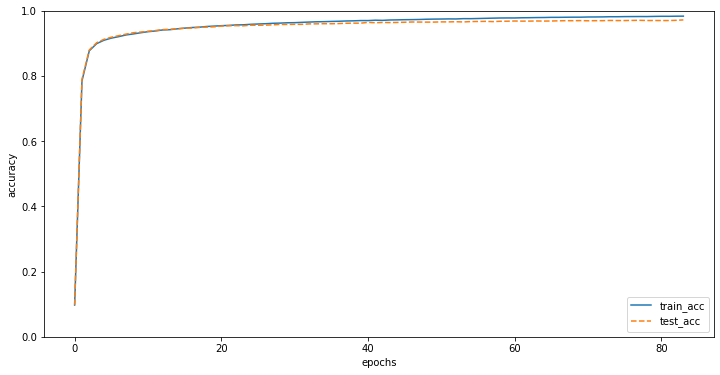

In [29]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6

# Accuracy 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train_acc')
plt.plot(x, test_acc_list, label='test_acc', linestyle='--')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

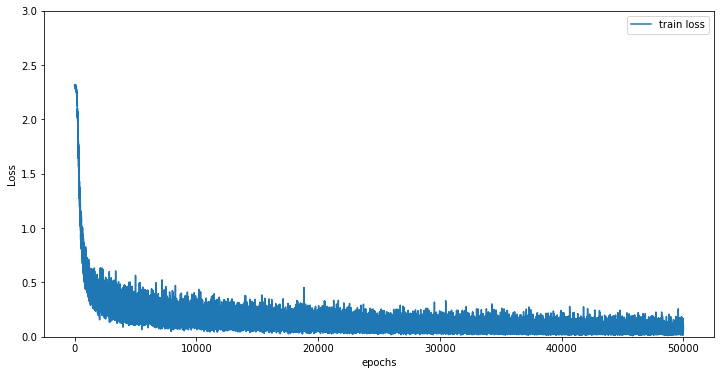

In [30]:
# Loss 그래프 그리기
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label = 'train loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.ylim(0, 3.0)
plt.legend(loc='best')
plt.show()